In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

import sys
print("Python executable:", sys.executable)
print("Pandas version:", pd.__version__)


Python executable: c:\Users\mrmic\GitHub\systematic-trading-research\.venv\Scripts\python.exe
Pandas version: 3.0.0


In [2]:
assets = {
    "SPY": "US Equities",
    "TLT": "US Long Bonds",
    "GLD": "Gold",
    "DBC": "Commodities",
    "EURUSD=X": "FX EUR/USD",
    "BTC-USD": "Bitcoin"
}


In [8]:
start_date = "2015-01-01"
end_date = "2024-12-31"

data = yf.download(
    list(assets.keys()),
    start=start_date,
    end=end_date,
    auto_adjust=True,
    progress=False
)["Close"]

data.head()


data = data.resample("B").last()
data = data.ffill()


In [9]:
print("Shape:", data.shape)
print("Missing values per asset:")
print(data.isna().sum())

data = data.dropna()


Shape: (2608, 6)
Missing values per asset:
Ticker
BTC-USD     0
DBC         1
EURUSD=X    0
GLD         1
SPY         1
TLT         1
dtype: int64


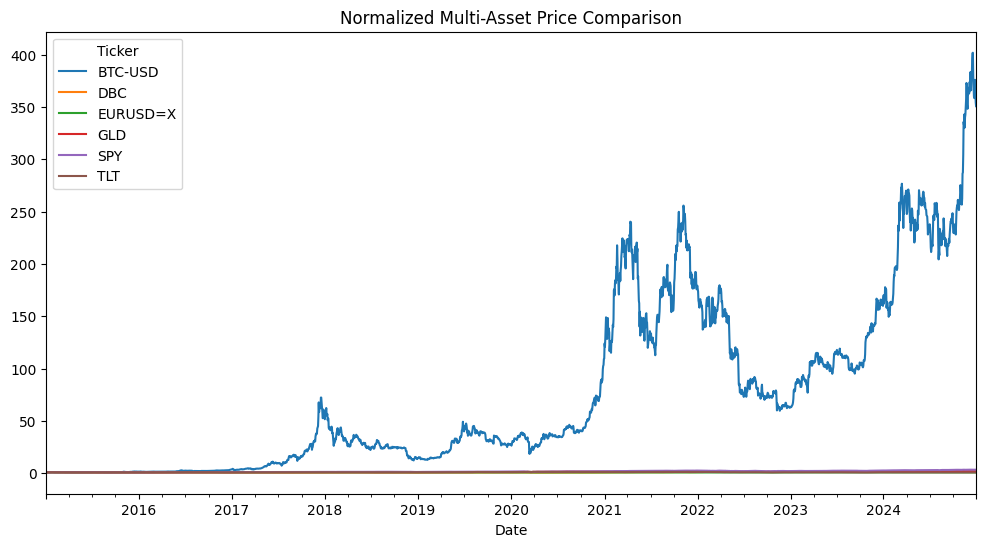

In [10]:
normalized = data / data.iloc[0]

normalized.plot(figsize=(12, 6))
plt.title("Normalized Multi-Asset Price Comparison")
plt.show()
